# MERGE009
Best of Each Type as of July 3

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

def group_mean_log_mae(y_true, y_pred, groups, floor=1e-9):
    maes = (y_true-y_pred).abs().groupby(groups).mean()
    return np.log(maes.map(lambda x: max(x, floor))).mean()

In [2]:
tracking = pd.read_csv('../tracking/tracking.csv')

In [3]:
tracking.head()

,run_id,model_number,eval_metric,n_estimators,early_stopping_rounds,random_state,n_threads,learning_rate,n_fold,model_type,training_time,n_features,depth,gml_oof_score,oof_score,lb_score,1JHC_mae_cv,2JHH_mae_cv,1JHN_mae_cv,2JHN_mae_cv,2JHC_mae_cv,3JHH_mae_cv,3JHC_mae_cv,3JHN_mae_cv,1JHC_std_mae_cv,2JHH_std_mae_cv,1JHN_std_mae_cv,2JHN_std_mae_cv,2JHC_std_mae_cv,3JHH_std_mae_cv,3JHC_std_mae_cv,3JHN_std_mae_cv,1JHC_tr_sec_f1,1JHC_pred_sec_f1,1JHC_tr_sec_f2,1JHC_pred_sec_f2,2JHH_tr_sec_f1,2JHH_pred_sec_f1,2JHH_tr_sec_f2,2JHH_pred_sec_f2,1JHN_tr_sec_f1,1JHN_pred_sec_f1,1JHN_tr_sec_f2,1JHN_pred_sec_f2,2JHN_tr_sec_f1,2JHN_pred_sec_f1,2JHN_tr_sec_f2,2JHN_pred_sec_f2,2JHC_tr_sec_f1,2JHC_pred_sec_f1,2JHC_tr_sec_f2,2JHC_pred_sec_f2,3JHH_tr_sec_f1,3JHH_pred_sec_f1,3JHH_tr_sec_f2,3JHH_pred_sec_f2,3JHC_tr_sec_f1,3JHC_pred_sec_f1,3JHC_tr_sec_f2,3JHC_pred_sec_f2,3JHN_tr_sec_f1,3JHN_pred_sec_f1,3JHN_tr_sec_f2,3JHN_pred_sec_f2,1JHC_csv_save_sec,2JHH_csv_save_sec,1JHN_csv_save_sec,2JHN_csv_save_sec,2JHC_csv_save_sec,3JHH_csv_save_sec,3JHC_csv_save_sec,3JHN_csv_save_sec,1JHC_tr_sec_f3,1JHC_pred_sec_f3,2JHH_tr_sec_f3,2JHH_pred_sec_f3,1JHN_tr_sec_f3,1JHN_pred_sec_f3,2JHN_tr_sec_f3,2JHN_pred_sec_f3,3JHH_tr_sec_f3,3JHH_pred_sec_f3,2JHC_tr_sec_f3,2JHC_pred_sec_f3,3JHC_tr_sec_f3,3JHC_pred_sec_f3,3JHN_tr_sec_f3,3JHN_pred_sec_f3,2JHN_f1_best_iter,2JHN_f2_best_iter,1JHN_f1_best_iter,1JHN_f2_best_iter,3JHN_f1_best_iter,3JHN_f2_best_iter,2JHH_f1_best_iter,2JHH_f2_best_iter,3JHH_f1_best_iter,3JHH_f2_best_iter,1JHC_f1_best_iter,1JHC_f2_best_iter,2JHC_f1_best_iter,2JHC_f2_best_iter,3JHC_f1_best_iter,3JHC_f2_best_iter,2JHNcv_f1,2JHNcv_f2,3JHNcv_f1,3JHNcv_f2,2JHCcv_f1,2JHCcv_f2,3JHCcv_f1,3JHCcv_f2,2JHHcv_f1,2JHHcv_f2,1JHNcv_f1,1JHNcv_f2,3JHHcv_f1,3JHHcv_f2,1JHCcv_f1,1JHCcv_f2
0,0610_1341,M010,mae,500000,500,529,32,0.5,5,NaN,NaN,61,NaN,NaN,0.9210,-0.452,1.9206,0.4542,1.0336,0.5335,0.8405,0.5699,0.8593,0.3264,0.00388,0.00112,0.00945,0.00394,0.00131,0.00149,0.00279,0.00184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0611_0308,M012,mae,500000,500,529,32,0.5,5,NaN,NaN,28,NaN,NaN,1.0109,-0.202,1.8632,0.4782,0.9773,0.5826,1.0352,0.6167,0.9867,0.3553,0.00415,0.00060,0.01524,0.00399,0.00435,0.00285,0.00162,0.00088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0611_1250,M013,mae,50000,500,529,32,0.5,5,catboost,137353.19,28,NaN,NaN,0.9488,NaN,1.7478,0.4442,1.0337,0.5300,0.9603,0.5761,0.9359,0.3300,0.00485,0.00293,0.01892,0.00264,0.00330,0.00167,0.00182,0.00202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0611_1249,M014,mae,500000,500,529,24,0.3,5,NaN,NaN,28,NaN,NaN,0.9142,-0.275,1.7005,0.4378,0.8751,0.5070,0.9209,0.5596,0.8967,0.3167,0.00432,0.00156,0.01019,0.00536,0.00292,0.00243,0.00197,0.00191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0613_0402,M015,mae,5

In [104]:
for cv in ['1JHC_mae_cv', '2JHH_mae_cv', '1JHN_mae_cv',
          '2JHN_mae_cv', '2JHC_mae_cv', '3JHH_mae_cv',
          '3JHC_mae_cv', '3JHN_mae_cv']:
    print(f'----------{cv}----------')
    print(tracking[['model_number','run_id','model_type', cv]] \
          .set_index('model_number') \
          .sort_values(cv) \
          .head())

----------1JHC_mae_cv----------
                 run_id model_type  1JHC_mae_cv
model_number                                   
M043          0710_2124   catboost       0.5124
M042          0709_1336   catboost       0.5650
M040          0708_1639   catboost       0.5782
M031          0702_0822   catboost       0.5793
M038          0707_0907   catboost       0.5874
----------2JHH_mae_cv----------
                 run_id model_type  2JHH_mae_cv
model_number                                   
M043          0710_2124   catboost       0.1382
M038          0707_0907   catboost       0.1405
M040          0708_1639   catboost       0.1421
M042          0709_1336   catboost       0.1428
M039          0708_1415   catboost       0.1440
----------1JHN_mae_cv----------
                 run_id model_type  1JHN_mae_cv
model_number                                   
M030          0701_1300       lgbm       0.3582
M043          0710_2124   catboost       0.3764
M035          0704_2344       lgbm      

In [5]:
# 1JHC - M043
# 2JHH - M038
# 1JHN - M030
# 2JHN - M031
# 2JHC - M040
# 3JHH - M038
# 3JHC - M042
# 3JHN - M038

sub_M031 = pd.read_csv('../temp/M031/temp4of8_M031_0702_0822_submission_lgb_3folds_5000000iter_0.05lr.csv')
oof_M031 = pd.read_csv('../temp/M031/temp4of8_M031_0702_0822_oof_lgb_3folds_5000000iter_0.05lr.csv')

In [6]:
sub_M038 = pd.read_csv('../temp/M038/temp6of8_M038_0707_0907_submission_catboost_2folds_500000iter_0.08lr.csv')
oof_M038 = pd.read_csv('../temp/M038/temp6of8_M038_0707_0907_oof_catboost_2folds_500000iter_0.08lr.csv')

In [7]:
sub_M040 = pd.read_csv('../temp/M040/temp2of8_M040_0708_1639_submission_catboost_2folds_500000iter_0.1lr.csv')
oof_M040 = pd.read_csv('../temp/M040/temp2of8_M040_0708_1639_oof_catboost_2folds_500000iter_0.1lr.csv')

In [8]:
sub_M037 = pd.read_csv('../submissions/M037_0706_2029_submission_lgb_2folds_-1.5106CV_500000iter_0.1lr.csv')
oof_M037 = pd.read_csv('../oof/M037_0706_2029_oof_catboost_2folds_-1.5106CV_500000iter_0.1lr.csv')

In [9]:
sub_M030_a = pd.read_csv('../temp/M030/temp4of8_M030_0701_1300_submission_lgb_3folds_5000000iter_0.05lr.csv')
sub_M030_b = pd.read_csv('../temp/M030/temp4of8_M030_0701_1302_submission_lgb_3folds_5000000iter_0.05lr.csv')
sub_M030_c = pd.read_csv('../temp/M030/temp4of8_M030_0701_1304_submission_lgb_3folds_5000000iter_0.05lr.csv')
sub_M030 = sub_M030_a.copy()
sub_M030['scc_a'] = sub_M030_a['scalar_coupling_constant']
sub_M030['scc_b'] = sub_M030_b['scalar_coupling_constant']
sub_M030['scc_c'] = sub_M030_c['scalar_coupling_constant']
sub_M030['scalar_coupling_constant'] = sub_M030[['scc_a','scc_b','scc_c']].mean(axis=1)
sub_M030 = sub_M030.drop(['scc_a','scc_b','scc_c'], axis=1).copy()

In [10]:
oof_M030_a = pd.read_csv('../temp/M030/temp4of8_M030_0701_1300_oof_lgb_3folds_5000000iter_0.05lr.csv')
oof_M030_b = pd.read_csv('../temp/M030/temp4of8_M030_0701_1302_oof_lgb_3folds_5000000iter_0.05lr.csv')
oof_M030_c = pd.read_csv('../temp/M030/temp4of8_M030_0701_1304_oof_lgb_3folds_5000000iter_0.05lr.csv')
oof_M030 = oof_M030_a.copy()
oof_M030['scc_a'] = oof_M030_a['oof_preds']
oof_M030['scc_b'] = oof_M030_b['oof_preds']
oof_M030['scc_c'] = oof_M030_c['oof_preds']
oof_M030['oof_preds'] = oof_M030[['scc_a','scc_b','scc_c']].sum(axis=1)
oof_M030 = oof_M030.drop(['scc_a','scc_b','scc_c'], axis=1).copy()

In [97]:
oof_M042 = pd.read_csv('../oof/M042_0709_1336_oof_catboost_2folds_-0.9447CV_500000iter_0.1lr.csv')
sub_M042 = pd.read_csv('../submissions/M042_0709_1336_submission_lgb_2folds_-0.9447CV_500000iter_0.1lr.csv')

In [12]:
oof_M043 = pd.read_csv('../oof/M043_0710_2124_oof_catboost_2folds_-1.5582CV_500000iter_0.1lr.csv')
sub_M043 = pd.read_csv('../submissions/M043_0710_2124_submission_lgb_2folds_-1.5582CV_500000iter_0.1lr.csv')

In [18]:
sub_M043 = sub_M043.sort_values('id').reset_index(drop=True)

In [25]:
oof_M043 = oof_M043.sort_values('id').reset_index(drop=True)

In [30]:
oof_M043.loc[oof_M043['type'] == '1JHC'].head()

,id,type,scalar_coupling_constant,oof_preds
0,0,1JHC,84.8076,87.367459
4,4,1JHC,84.8074,87.665804
7,7,1JHC,84.8093,87.933195
9,9,1JHC,84.8095,87.620410
17,17,1JHC,171.2200,145.287071


In [98]:
oof_final = oof_M031[['id','type','scalar_coupling_constant']].copy()
test = pd.read_csv('../input/test.csv')


oof_final.loc[oof_final['type'].isin(['2JHN']), 'oof_preds'] = \
    oof_M031.loc[oof_final['type'].isin(['2JHN'])]['oof_preds']
test.loc[test['type'].isin(['2JHN']), 'scalar_coupling_constant'] = \
    sub_M031.loc[test['type'].isin(['2JHN'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['1JHN']), 'oof_preds'] = \
    oof_M030.loc[oof_final['type'].isin(['1JHN'])]['oof_preds']
test.loc[test['type'].isin(['1JHN']), 'scalar_coupling_constant'] = \
    sub_M030.loc[test['type'].isin(['1JHN'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['3JHC']), 'oof_preds'] = \
    oof_M042.loc[oof_final['type'].isin(['3JHC'])]['oof_preds']
test.loc[test['type'].isin(['3JHC']), 'scalar_coupling_constant'] = \
    sub_M042.loc[test['type'].isin(['3JHC'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['2JHH','3JHH','3JHN']), 'oof_preds'] = \
    oof_M038.loc[oof_final['type'].isin(['2JHH','3JHH','3JHN'])]['oof_preds']
test.loc[test['type'].isin(['2JHH','3JHH','3JHN']), 'scalar_coupling_constant'] = \
    sub_M038.loc[test['type'].isin(['2JHH','3JHH','3JHN'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['2JHC']), 'oof_preds'] = \
    oof_M040.loc[oof_final['type'].isin(['2JHC'])]['oof_preds']
test.loc[test['type'].isin(['2JHC']), 'scalar_coupling_constant'] = \
    sub_M040.loc[test['type'].isin(['2JHC'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['1JHC']), 'oof_preds'] = \
    oof_M043.loc[oof_final['type'].isin(['1JHC'])]['oof_preds']
test.loc[test['type'].isin(['1JHC']), 'scalar_coupling_constant'] = \
    sub_M043.loc[test['type'].isin(['1JHC'])]['scalar_coupling_constant']


In [99]:
for i, d in oof_final.groupby('type'):
    print(i)
    print(mean_absolute_error(d['scalar_coupling_constant'], d['oof_preds']))

1JHC
0.5124256829446088
1JHN
0.35815790678334736
2JHC
0.21914016019278726
2JHH
0.14050419747612156
2JHN
0.13000911360249118
3JHC
0.24579182657408416
3JHH
0.14977686316390257
3JHN
0.11470001176414876


In [38]:
group_mean_log_mae(oof_final['scalar_coupling_constant'], oof_final['oof_preds'], oof_final['type'])

-1.5854259312368042

In [39]:
sub_M025 = pd.read_csv('../submissions/M025_0629_1311_submission_lgb_2folds_-1.3265CV_500000iter_0.1lr.csv')
test['scc_good'] = sub_M025['scalar_coupling_constant']

In [40]:
test[['scc_good','scalar_coupling_constant']].corr()

,scc_good,scalar_coupling_constant
scc_good,1.000000,0.999311
scalar_coupling_constant,0.999311,1.000000


In [41]:
test[['id','scalar_coupling_constant']] \
    .to_csv('../submissions/MERGE010_submission_M030_M031_M038_M40_M042_M043_-1.5854CV.csv', index=False)

In [42]:
oof_final.to_csv('../oof/MERGE009_submission_M030_M031_M038_M40_M042_M043_-1.5854CV.csv', index=False)

# Something wrong with 1JHC Submission

In [52]:
good_sub = pd.read_csv('../submissions/MERGE009_submission_M030_M031_M038_M40_M042_-1.5703CV.csv')

In [56]:
temp = test.merge(good_sub)

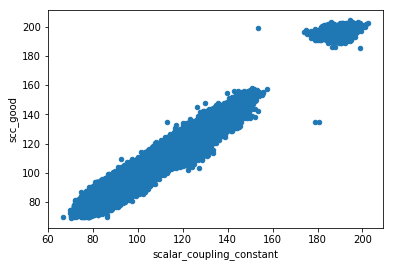

In [70]:
test.loc[test['type'] == '1JHC'].plot(x='scalar_coupling_constant', y='scc_good', kind='scatter')

In [61]:
t2 = pd.read_csv('../submissions/M043_0710_2124_submission_lgb_2folds_-0.9600CV_500000iter_0.1lr.csv')

In [75]:
test['change'] = np.abs(test['scalar_coupling_constant'] - test['scc_good'])

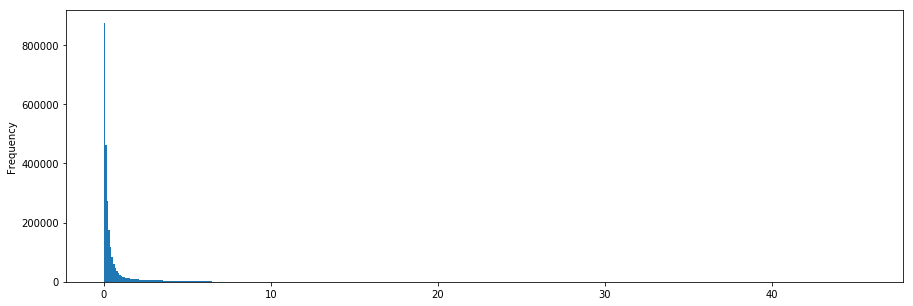

In [81]:
test.sort_values('change')['change'].plot(kind='hist', bins=500, figsize=(15, 5))

In [82]:
test.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,scc_good,change
0,4658147,dsgdb9nsd_000004,2,0,2JHC,15.162750,8.873624,6.289126
1,4658148,dsgdb9nsd_000004,2,1,1JHC,180.471621,134.914493,45.557128
2,4658149,dsgdb9nsd_000004,2,3,3JHH,6.516150,3.716820,2.799330
3,4658150,dsgdb9nsd_000004,3,0,1JHC,179.013627,134.914493,44.099134
4,4658151,dsgdb9nsd_000004,3,1,2JHC,13.972036,8.873624,5.098412


# Only do 2JHH from New

In [100]:
oof_final = oof_M031[['id','type','scalar_coupling_constant']].copy()
test = pd.read_csv('../input/test.csv')


oof_final.loc[oof_final['type'].isin(['2JHN']), 'oof_preds'] = \
    oof_M031.loc[oof_final['type'].isin(['2JHN'])]['oof_preds']
test.loc[test['type'].isin(['2JHN']), 'scalar_coupling_constant'] = \
    sub_M031.loc[test['type'].isin(['2JHN'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['1JHN']), 'oof_preds'] = \
    oof_M030.loc[oof_final['type'].isin(['1JHN'])]['oof_preds']
test.loc[test['type'].isin(['1JHN']), 'scalar_coupling_constant'] = \
    sub_M030.loc[test['type'].isin(['1JHN'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['3JHC','1JHC']), 'oof_preds'] = \
    oof_M042.loc[oof_final['type'].isin(['3JHC','1JHC'])]['oof_preds']
test.loc[test['type'].isin(['3JHC','1JHC']), 'scalar_coupling_constant'] = \
    sub_M042.loc[test['type'].isin(['3JHC','1JHC'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['2JHH','3JHH','3JHN']), 'oof_preds'] = \
    oof_M038.loc[oof_final['type'].isin(['2JHH','3JHH','3JHN'])]['oof_preds']
test.loc[test['type'].isin(['2JHH','3JHH','3JHN']), 'scalar_coupling_constant'] = \
    sub_M038.loc[test['type'].isin(['2JHH','3JHH','3JHN'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['2JHC']), 'oof_preds'] = \
    oof_M040.loc[oof_final['type'].isin(['2JHC'])]['oof_preds']
test.loc[test['type'].isin(['2JHC']), 'scalar_coupling_constant'] = \
    sub_M040.loc[test['type'].isin(['2JHC'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['2JHH']), 'oof_preds'] = \
    oof_M043.loc[oof_final['type'].isin(['2JHH'])]['oof_preds']
test.loc[test['type'].isin(['2JHH']), 'scalar_coupling_constant'] = \
    sub_M043.loc[test['type'].isin(['2JHH'])]['scalar_coupling_constant']


In [101]:
for i, d in oof_final.groupby('type'):
    print(i)
    print(mean_absolute_error(d['scalar_coupling_constant'], d['oof_preds']))

1JHC
0.5649832031571036
1JHN
0.35815790678334736
2JHC
0.21914016019278726
2JHH
0.13819274540620405
2JHN
0.13000911360249118
3JHC
0.24579182657408416
3JHH
0.14977686316390257
3JHN
0.11470001176414876


In [103]:
test[['id','scalar_coupling_constant']].to_csv('../submissions/MERGE010-TEST2-only_2JHH_FROM_M043.csv', index=False)

In [107]:
oof_final = oof_M031[['id','type','scalar_coupling_constant']].copy()
test = pd.read_csv('../input/test.csv')


oof_final.loc[oof_final['type'].isin(['2JHN']), 'oof_preds'] = \
    oof_M031.loc[oof_final['type'].isin(['2JHN'])]['oof_preds']
test.loc[test['type'].isin(['2JHN']), 'scalar_coupling_constant'] = \
    sub_M031.loc[test['type'].isin(['2JHN'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['1JHN']), 'oof_preds'] = \
    oof_M030.loc[oof_final['type'].isin(['1JHN'])]['oof_preds']
test.loc[test['type'].isin(['1JHN']), 'scalar_coupling_constant'] = \
    sub_M030.loc[test['type'].isin(['1JHN'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['3JHC','1JHC']), 'oof_preds'] = \
    oof_M042.loc[oof_final['type'].isin(['3JHC','1JHC'])]['oof_preds']
test.loc[test['type'].isin(['3JHC','1JHC']), 'scalar_coupling_constant'] = \
    sub_M042.loc[test['type'].isin(['3JHC','1JHC'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['2JHH','3JHH','3JHN']), 'oof_preds'] = \
    oof_M038.loc[oof_final['type'].isin(['2JHH','3JHH','3JHN'])]['oof_preds']
test.loc[test['type'].isin(['2JHH','3JHH','3JHN']), 'scalar_coupling_constant'] = \
    sub_M038.loc[test['type'].isin(['2JHH','3JHH','3JHN'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['2JHC']), 'oof_preds'] = \
    oof_M040.loc[oof_final['type'].isin(['2JHC'])]['oof_preds']
test.loc[test['type'].isin(['2JHC']), 'scalar_coupling_constant'] = \
    sub_M040.loc[test['type'].isin(['2JHC'])]['scalar_coupling_constant']

oof_final.loc[oof_final['type'].isin(['2JHH','1JHC','2JHC']), 'oof_preds'] = \
    oof_M043.loc[oof_final['type'].isin(['2JHH','1JHC','2JHC'])]['oof_preds']
test.loc[test['type'].isin(['2JHH','1JHC','2JHC']), 'scalar_coupling_constant'] = \
    sub_M043.loc[test['type'].isin(['2JHH','1JHC','2JHC'])]['scalar_coupling_constant']


In [108]:
for i, d in oof_final.groupby('type'):
    print(i)
    print(mean_absolute_error(d['scalar_coupling_constant'], d['oof_preds']))

1JHC
0.5124256829446088
1JHN
0.35815790678334736
2JHC
0.21370125347696164
2JHH
0.13819274540620405
2JHN
0.13000911360249118
3JHC
0.24579182657408416
3JHH
0.14977686316390257
3JHN
0.11470001176414876


In [109]:
ttt = pd.read_csv('../submissions/M043_0710_2124_submission_lgb_2folds_-0.9600CV_500000iter_0.1lr.csv')

In [115]:
test['new'] = ttt['scalar_coupling_constant']

In [117]:
test.loc[test['type'] == '1JHC']

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,new
1,4658148,dsgdb9nsd_000004,2,1,1JHC,180.471621,180.471621
3,4658150,dsgdb9nsd_000004,3,0,1JHC,179.013627,179.013627
5,4658152,dsgdb9nsd_000015,3,0,1JHC,93.362496,93.362496
9,4658156,dsgdb9nsd_000015,4,0,1JHC,93.453523,93.453523
12,4658159,dsgdb9nsd_000015,5,0,1JHC,89.604986,89.604986
15,4658162,dsgdb9nsd_000015,6,2,1JHC,91.526354,91.526354
19,4658166,dsgdb9nsd_000015,7,2,1JHC,91.549988,91.549988
22,4658169,dsgdb9nsd_000015,8,2,1JHC,83.290892,83.290892
23,4658170,dsgdb9nsd_000016,3,0,1JHC,107.425556,107.425556
31,4658178,dsgdb9nsd_000016,4,0,1JHC,107.642748,107.642748
